<a href="https://colab.research.google.com/github/ermkgoel/AIML-Projects/blob/master/DeepLearningMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline



# Using Tensorflow Keras instead of the original Keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense




In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
xtrain.shape


(60000, 28, 28)

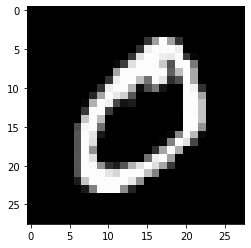

In [5]:
plt.imshow(xtrain[1,:,:],cmap='gray')

In [6]:
ytrain[1]

0

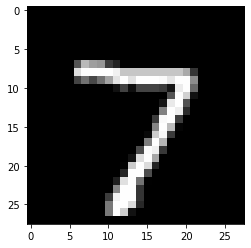

In [7]:
plt.imshow(xtest[0,:,:],cmap='gray')

In [8]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [9]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [10]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [11]:
x_test.shape

(10000, 784)

In [12]:
x_train/=255
x_test/=255

In [13]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [14]:
# Initialize the constructor

model = Sequential()

In [15]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
Q

In [25]:
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1) 

Epoch 1/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0040 - accuracy: 0.9989
Epoch 2/10
235/235 [==============================] - 5s 20ms/step - loss: 5.2802e-04 - accuracy: 0.9999
Epoch 3/10
235/235 [==============================] - 5s 20ms/step - loss: 2.0289e-04 - accuracy: 1.0000
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 1.3322e-04 - accuracy: 1.0000
Epoch 5/10
235/235 [==============================] - 5s 20ms/step - loss: 1.0449e-04 - accuracy: 1.0000
Epoch 6/10
235/235 [==============================] - 5s 20ms/step - loss: 8.6293e-05 - accuracy: 1.0000
Epoch 7/10
235/235 [==============================] - 5s 20ms/step - loss: 7.2609e-05 - accuracy: 1.0000
Epoch 8/10
235/235 [==============================] - 5s 20ms/step - loss: 6.2231e-05 - accuracy: 1.0000
Epoch 9/10
235/235 [==============================] - 5s 20ms/step - loss: 5.3995e-05 - accuracy: 1.0000
Epoch 10/10
235/235 [==============================] - 5s 2

In [26]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.985
Loss: 0.077


In [28]:
y_predict = model.predict(x_test)

In [20]:
y_predict[0]

array([2.0264326e-06, 6.9090055e-07, 1.0208258e-04, 2.3057908e-03,
       3.0189213e-08, 1.1894099e-06, 1.8031253e-10, 9.9732119e-01,
       1.7749091e-05, 2.4929590e-04], dtype=float32)

In [30]:
np.argmax(y_predict[120])

5

In [33]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 971    1    1    1    1    0    2    1    1    1]
 [   0 1125    3    1    0    0    2    1    3    0]
 [   3    1 1015    1    2    0    1    5    4    0]
 [   1    0    3  996    0    4    0    2    2    2]
 [   1    1    3    0  964    0    3    1    0    9]
 [   1    0    0    8    1  877    2    0    2    1]
 [   2    2    1    1    1    3  948    0    0    0]
 [   0    3    6    0    0    0    0 1012    2    5]
 [   1    0    2    2    5    1    0    2  955    6]
 [   2    2    0    3    7    2    1    1    2  989]]


In [34]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

